# Теория

**Ковариационные матрицы**

Например у нас три случайные вличины $ X $ $ Y $ $ Z $

Тогда ковариационная матрица будет выглядеть следующим образом (необходимо посчитать все возможные ковариации между парами случайных величин).

$$
\begin{vmatrix}
cov(X, X) & cov(X, Y) & cov(X, Z) \\
cov(Y, X) & cov(Y, Y) & cov(Y, Z) \\
cov(Z, X) & cov(Z, Y) & cov(Z, Z)
\end{vmatrix}
$$

Ковариация вычисляется по следующей формуле:

$$ cov(X, Y) = M(X \cdot Y) - M(X) \cdot M(Y) $$ 

При этом ковариация случайной величины самой на себя равняется дисперсии случайной величины:

$$ cov(X, X) = M(X^2) - M^2(X) = D(X) $$

И элементы ковариационной матрицы, стоящие на главной диагонали по сути являются дисперсиями случайных величин:

$$
\begin{vmatrix}
D(X) & cov(X, Y) & cov(X, Z) \\
cov(Y, X) & D(Y) & cov(Y, Z) \\
cov(Z, X) & cov(Z, Y) & D(Z)
\end{vmatrix}
$$

**Математическая модель системы / процесса**

$$
x_{k} = Fx_{k - 1} + Bu_{k} + w_{k}
$$

где

- $ x_{k} $ - текущее состояние системы

Содержимое этого вектора зависит от фантазии разработчика и решаемой задачи. Например, мы можем отслеживать координаты объекта, а также его скорость и ускорение. В этом случае мы имеем вектор из трех переменных:

$$
\begin{vmatrix}
позиция \\
скорость \\
ускорение
\end{vmatrix}
$$

это для одномерного случая, когда мы меряем перемещение вдоль одной координаты. В случае перемещения объекта в трех измерениях (3 оси перемещения в пространстве) будет по одному такому набору, т.е. 9-ть значений в векторе.

Мера неопределенности вектора состояния - $ P $. Представляет из себя ковариационную матрицу - квадратную матрицу, порядок которой равен размеру вектора состояния. Эта матрица определяет "уверенность" фильтра в оценке переменных состояния. Алгоритм самостоятельно обновляет матрицу в процессе работы. Однако нам нужно установить начальное состояние вместе с исходным предположением о векторе состояния.

Во многих случаях нам неизвестны значения ковариации между переменными для изначального состояния (элементы матрицы, расположенные вне главной диагонали). Поэтому можно проигнорировать их, установив равными 0. Фильтр самостоятельно обновит значения в процессе работы. Если значения ковариации известны, то конечно же, стоит использовать их.

Дисперсию же игнорировать не выйдет. Необходимо установить значения дисперсии в зависимости от нашей уверенности в исходном векторе состояния. Для этого можно воспользоваться, к примеру, правилом трех сигм: значение случайной величины попадает в диапазон $ -3\sigma \ldots +3\sigma $ с вероятностью 99.7%.

- $ x_{k - 1} $ - состояние системы на предыдущем шаге
- $ F $ - матрица процесса (state transition matrix). Задает систему линейных уравнений, описывающих, как получается новое состояние из предыдущего

К примеру матрица равноускоренного движения будет выглядеть:

$$
\begin{vmatrix}
1 & \Delta t & \frac{\Delta t^2}{2} \\
0 & 1 & \Delta t \\
0 & 0 & 1
\end{vmatrix}
$$

и вектор текущего состояния будет выглядеть следующим образом (на основе вектора предыдущего сосстояния) при движении c постоянной скорость 10 из 0-го положения в пространстве:

$$
x_{k} = F \times x_{k - 1} = 
\begin{vmatrix}
1 & \Delta t & \frac{\Delta t^2}{2} \\
0 & 1 & \Delta t \\
0 & 0 & 1
\end{vmatrix}
\times
\begin{vmatrix}
0 \\
10 \\
0
\end{vmatrix} = 
\begin{vmatrix}
0 + 10 \cdot \Delta t + 0 \cdot \frac{\Delta t^2}{2} \\
10 \\
0
\end{vmatrix} = 
\begin{vmatrix}
10 \cdot \Delta t \\
10 \\
0
\end{vmatrix}
$$

Первая строка - хорошо знакомое уравнение (перемещение в пространстве со скоростью $ v $ и ускорением $ a $ из начального положения $ s_{0} $)

$$
s_{t} = s_{0} + v_{0} \cdot t + \frac{a \cdot t^2}{2}
$$

- $ B $ - матрица управления, а вектор $ u_{k} $ - вектор управляющих воздействий.

В некоторых случаях, мы напрямую управляем процессом (например, управляем квадракоптером с помощью пульта Д/У) и нам достоверно известны задаваемые параметры (заданая на пульте скорость полета). В случаях, когда мы только наблюдаем за процессом, это слагаемое отсутствует.

- Последнее слагаемое $ w $ - это вектор ошибки модели.

Модель равноускоренного движения ябсолютно точно описывает положение объекта. Однако в реальном мире есть множество случайных факторов - неровные дороги, ветер и т.д. Иногда процесс сложен и приходится использовать упрощенную модель, которая не учитывает аспекты. Именно так возникает ошибка модели.
То, что мы имеем это слагаемое, не означает, что мы знаем ошибку на каждом шаге или описываем ее аналитически. Однако фильтр Калмана делает важное предположение - ошибка имеет нормальное распределение с нулевым математическим ожиданием и ковариационной матрицей $ Q $ - ковариационная матрица модели ошибки. Является квадратной матрицей, порядок которой равен размеру вектора состояния. Формирование данной матрицы см. ниже.

**Модель наболюдения**

$$ z_{k} = Hx_{k} + v_{k} $$

где

- z - вектор измерения / наблюдения. Это значения, получаемые с датчиков системы.

- первое слагаемое $ Hx_{k} $ - модель, связывающая вектор состояния $ x $ с соответствующими ему показаниями датчиков.

К примеру, если у нас будет установлен только один датчик, измеряющий положение объекта в пространстве, то $ H $ будет выглядеть следующим образом:

$$
\begin{vmatrix}
1 \\
0 \\
0
\end{vmatrix}
$$

Строки матрицы соответствуют переменным в векторе состояния, столбцы - элементам вектора измерений. В первой строке матрицы находится значение "1" так как единица измерения положения в векторе состояния совпадает с единицей измерения значения в векторе измерений. Остальные "0" т.к. переменные состояния соответствующие этим строкам не измеряются датчиком.

Если мы добавим еще один датчик, к примеру измеряющий скорость, то $ H $ будет выглядеть следующим образом:

$$
\begin{vmatrix}
1 & 0 \\
0 & 1 \\
0 & 0
\end{vmatrix}
$$

И если еще один спидометр и один аксерелореметр:

$$
\begin{vmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1
\end{vmatrix}
$$

- второе слагаемое $ v $ - вектор ошибок измерения. Предполагается, что ошибка измерений распределена нормально с нулевым математическим ожиданием. $ R $ - ковариационная матрица шума измерений, соответствующая вектору $ v $. Порядок матрицы равен размеру вектора наблюдений $ z_{k} $.

Во многих случаях можно считать, что измерения не коррелируют друг с другом. В этом случае матрица $ R $ будет являться диагональной матрицей, где все элементы вне главной диагнали равны 0. Достаточно будет установить значения дисперсии для каждого измеремого параметра. Иногда эти данные можно найти в документации к используемым датчикам. Однако, если справочной информации нет, то можно оценить дисперсию, измеряя датчиком известное эталонное значение, или воспользоваться правилом трех сигм.

**Формирование ковариационно матрицы $ Q $**

Методы заполнения матрицы $ Q $:
1. _Модель непрерывного белого шума_

Мы предполагаем, что ускорение постоянно на каждом шаге. Но, к примеру, из-за неровностей дороги ускорение, на самом деле, постоянно изменяется. Мы можем предположить, что изменение ускорения происходит под воздействием непрерывного белого шума с нулевым математическим ожиданием (т.е. усреднив все небольшие изменения ускорения за время движения мы получаем 0).

В этой модели матрица $ Q $ рассчитывается следующим образом:
$$ Q = \int^{\Delta t}_{0} F(t)Q_{c}F^{T}(t)dt $$
Мы формируем матрицу $ Q_{c} $ в соответствии со структурой вектора состояния. Наивысшему порядку производной соответствует правый нижний элемент матрицы. В случае, если в векторе состояния несколько таких переменных, то каждая из них учитывается в матрице.

Для нашей модели равноускоренного движения матрица будет выглядеть так:
$$
Q_{c} = 
\begin{vmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 
\end{vmatrix}
\Phi_{s}
$$
где $ \Phi_{s} $ - спектральная плотность мощности белого шума

Подставляем матрицу процесса, соответствующую нашей модели:
$$
F = 
\begin{vmatrix}
1 & \Delta t & \frac{\Delta t^2}{2} \\
0 & 1 & \Delta t \\
0 & 0 & 1 
\end{vmatrix}
$$
После перемножения и интегрирования получаем:
$$
Q = 
\begin{vmatrix}
\frac{\Delta t^5}{20} & \frac{\Delta t^4}{8} & \frac{\Delta t^3}{6} \\
\frac{\Delta t^4}{8}  & \frac{\Delta t^3}{3} & \frac{\Delta t^2}{2} \\
\frac{\Delta t^3}{6}  & \frac{\Delta t^2}{2} & \Delta t 
\end{vmatrix}
\Phi_{s}
$$

2. _Модель "кусочного" белого шума_

Мы предполагаем, что ускорение на самом деле постоянно в течении каждого шага моделирования, но дискретно и независимо меняется между шагами. Выглядит очень похоже на предыдущую модель, но небольшая разница есть.
$$ f(x) = Fx + Гw $$
Г - мощность шума

$ w $ - наивысший порядок производной, используемой в модели (т.е. ускорение для вышеописанной модели)

В этой модели матрица $ Q $ определяется следующим образом:
$$ Q = \mathbb{E} [Гw(t)w(t)Г^{T}] = Г \sigma^{2}_{v} Г^{T} $$
Из матрицы процесса F
$$
F = 
\begin{vmatrix}
1 & \Delta t & \frac{\Delta t^2}{2} \\
0 & 1 & \Delta t \\
0 & 0 & 1
\end{vmatrix}
$$
Берем столбец с наивысшим порядком производной
$$
F = 
\begin{vmatrix}
\frac{\Delta t^2}{2} \\
\Delta t \\
1
\end{vmatrix}
$$
Подставляем в формулу и в итоге получаем:
$$
Q = 
\begin{vmatrix}
\frac{\Delta t^4}{4} & \frac{\Delta t^3}{2} & \frac{\Delta t^2}{2} \\
\frac{\Delta t^3}{2} & \Delta t^2           & \Delta t \\
\frac{\Delta t^2}{2} & \Delta t             & 1
\end{vmatrix} \sigma_{v}^{2}
$$
Обе модели являются приближением того, что происходит на самом деле в реальности. На практике, приходится экспериментировать и выяснять, какая модель подходит лучше в каждом отдельном случае. Плюсом второй модели является то, что мы оперируем дисперсией шума, с которой уже хорошо умеем работать.

3. _Простейший подход_

В некоторых случаях прибегают к грубому упрощению: устанавливают все элементы матрицы $ Q $ равными 0, за исключением элементов, соответствующих максимальным порядкам производных переменных состояния.

Действительно, если рассчитать $ Q $ по одному из приведенных выше методов, при достаточно малых значениях $ \Delta t $, значения элементов матрицы $ Q $ оказываются очень близкими к нулю.

Т.е. для модели равноускоренного движения можно взять матрицу $ Q $ следующего вида:

$$
Q = 
\begin{vmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & \sigma^2
\end{vmatrix}
$$
И хотя такой подход не совсем корректен, его можно использовать в качестве первого приближения или для экспериментов. Без сомнения, не стоит выбирать матрицу $ Q $ таким образом для любых важных задач без весомых причин.

# Практика

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from typing import Union
from filterpy import kalman, common

In [3]:
def simulate_sensor(
    sample_size: int, noise_sigma: Union[int, float], dt: Union[int, float], 
    initial_state: np.array, seed: int = None, start_time: Union[int, float] = 0.0,
    change_points: tuple = (None, None), change_values: tuple = (None, None)
) -> pd.DataFrame:
    
    if seed is not None:
        np.random.seed(seed)
    noise = np.random.normal(loc=0.0, scale=noise_sigma, size=sample_size)
    states = np.zeros(shape=(initial_state.shape[-1], sample_size))
    states[:, 0] = initial_state.flatten()
    
    for i in range(1, sample_size):
        # модель равноускоренного движения
        position =     states[0, i - 1]
        velocity =     states[1, i - 1]
        acceleration = states[2, i - 1]
        
        position += (velocity * dt + (acceleration * dt ** 2) / 2.0)
        velocity += (acceleration * dt)
        acceleration = acceleration
        
        # переход на равномерное движение
        if change_points[0] is not None and change_values[0] is not None and i > sample_size * change_points[0]:
            velocity += change_values[0]
            change_points = (None, change_points[1])
            
        # переход на равноускоренное движение
        if change_points[1] is not None and change_values[1] is not None and i > sample_size * change_points[1]:
            acceleration += change_values[1]
            change_points = (change_points[0], None)
        
        states[0, i] = position
        states[1, i] = velocity
        states[2, i] = acceleration
    
    timeline = np.linspace(0, sample_size * dt, sample_size, endpoint=False) + start_time
    states = pd.DataFrame(index=timeline, data=states.T, columns=['Положение', 'Скорость', 'Ускорение'])
    states['Показания_датчика'] = states['Положение'] + noise
    return states


def variance_calculation(data: pd.Series, dt: Union[int, float], derivative: int) -> Union[int, float]:
    for _ in range(derivative):
        data = (data.shift(-1) - data) / dt
    return data.std() ** 2

## Пример 1

### Генерируем данные

In [336]:
dt = 0.01                # шаг времени
measurement_sigma = 0.5  # среднеквадратичное отклонение ошибки датчика
process_noise = 1e-4     # погрешность модели

# начальное состояние [положение, скорость, ускорение]
trajectory = simulate_sensor(
    sample_size=1000, 
    noise_sigma=measurement_sigma, 
    dt=dt, 
    initial_state=np.array([0, 1, 0])
)

display(trajectory.head())
print(trajectory.shape)

,Положение,Скорость,Ускорение,Показания_датчика
0.00,0.00,1.0,0.0,0.167995
0.01,0.01,1.0,0.0,0.447735
0.02,0.02,1.0,0.0,0.653911
0.03,0.03,1.0,0.0,1.059009
0.04,0.04,1.0,0.0,0.007224


(1000, 4)


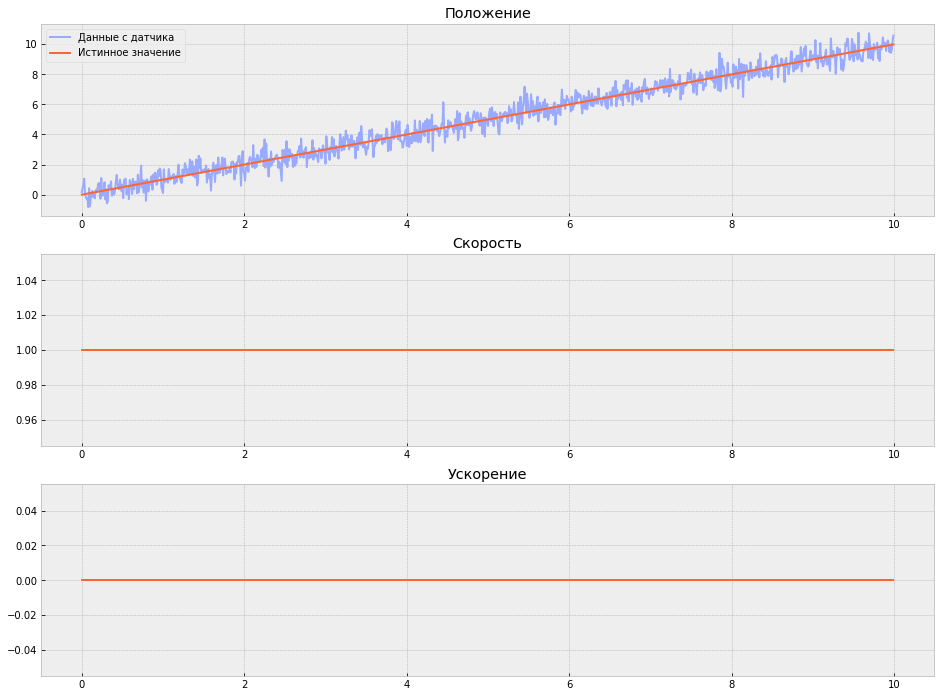

In [337]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, trajectory['Показания_датчика'], label='Данные с датчика', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, trajectory['Скорость'], color='#FF6633')
    ax[1].set_title('Скорость')
    
    ax[2].plot(trajectory.index, trajectory['Ускорение'], color='#FF6633')
    ax[2].set_title('Ускорение')
    fig.show()

### Применяем фильтр Калмана

In [338]:
# создаем объект KalmanFilter
kf = kalman.KalmanFilter(
    dim_x=3,  # размер вектора состояния
    dim_z=1   # размер вектора измерений
)

# F - матрица процесса - размер dim_x на dim_x - 3x3
kf.F = np.array(
    [
        [1.0, dt,  (dt**2)/2],
        [0.0, 1.0, dt],
        [0.0, 0.0, 1.0]
    ]
)

# матрица наблюдения - dim_z на dim_x - 1x3
kf.H = np.array(
    [
        [1.0, 0.0, 0.0]
    ]
)

# ковариационная матрица ошибки модели
kf.Q = common.Q_discrete_white_noise(dim=3, dt=dt, var=process_noise)

# ковариационная матрица ошибки измерения - 1x1
kf.R = np.array([[measurement_sigma * measurement_sigma]])

# начальное состояние
kf.x = np.array([0.0, 0.0, 0.0])

# ковариационная матрица для начального состояния
s_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=0)
v_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=1)
a_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=2)
kf.P = np.array(
    [
        [s_variance, 0.0,        0.0],
        [0.0,        v_variance, 0.0],
        [0.0,        0.0,        a_variance]
    ]
)

filter_state = list()
state_covariance_history = list()

# обработка данных
for i, z in enumerate(trajectory['Показания_датчика'].values):
    z = [z]       # вектор измерений
    kf.predict()  # этап предсказания
    kf.update(z)  # этап коррекции
    
    filter_state.append(kf.x)
    state_covariance_history.append(kf.P)
    
filter_state = np.array(filter_state)
state_covariance_history = np.array(state_covariance_history)

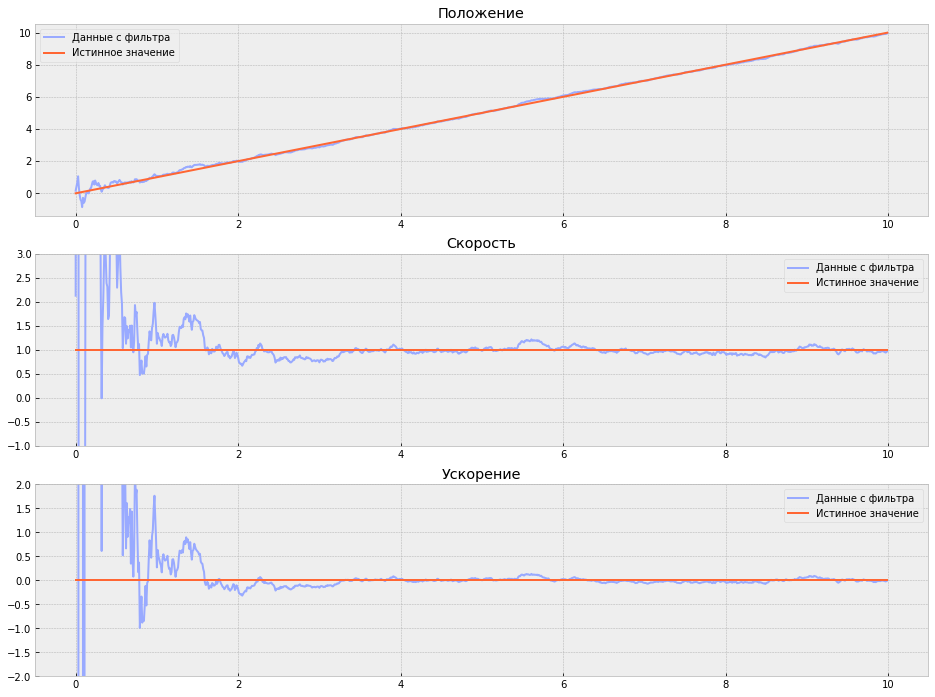

In [339]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, filter_state[:, 0], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, filter_state[:, 1], label='Данные с фильтра', color='#99AAFF')
    ax[1].plot(trajectory.index, trajectory['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory['Скорость'].min() - 2, top=trajectory['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory.index, filter_state[:, 2], label='Данные с фильтра', color='#99AAFF')
    ax[2].plot(trajectory.index, trajectory['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory['Ускорение'].min() - 2, top=trajectory['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()

## Пример 2

### Генерируем данные

In [340]:
dt = 0.01                # шаг времени
measurement_sigma = 0.5  # среднеквадратичное отклонение ошибки датчика
process_noise = 1e-4     # погрешность модели

# начальное состояние [положение, скорость, ускорение]
trajectory = simulate_sensor(
    sample_size=1000,
    noise_sigma=measurement_sigma,
    dt=dt,
    initial_state=np.array([0, 0, 0]),
    change_points=(0.2, 0.6),
    change_values=(10, 10)
)

display(trajectory.head())
print(trajectory.shape)

,Положение,Скорость,Ускорение,Показания_датчика
0.00,0.0,0.0,0.0,0.497235
0.01,0.0,0.0,0.0,0.377936
0.02,0.0,0.0,0.0,-0.315061
0.03,0.0,0.0,0.0,0.471900
0.04,0.0,0.0,0.0,-0.631425


(1000, 4)


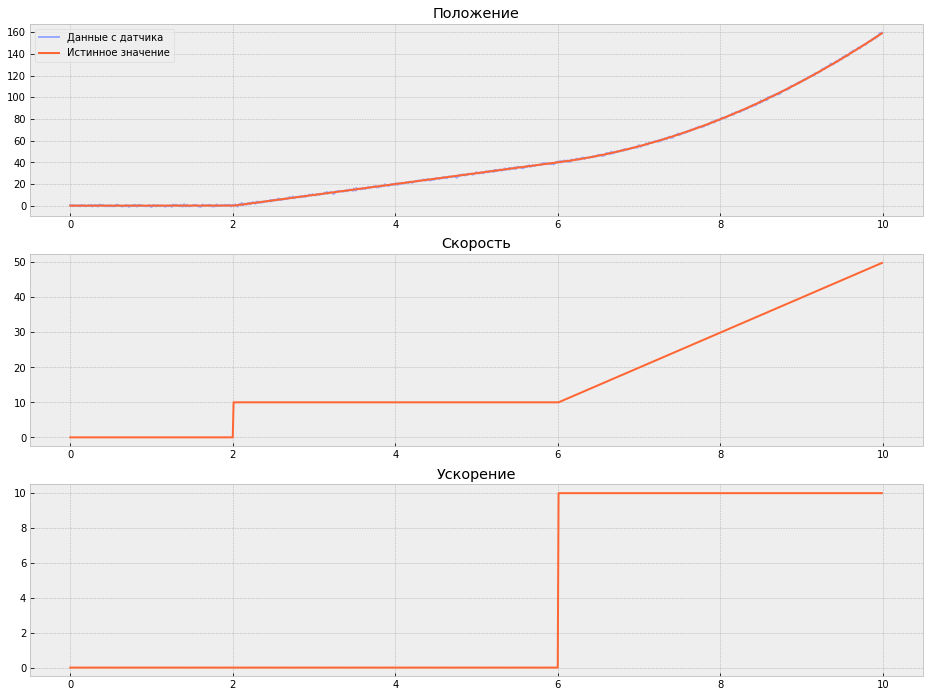

In [341]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, trajectory['Показания_датчика'], label='Данные с датчика', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, trajectory['Скорость'], color='#FF6633')
    ax[1].set_title('Скорость')
    
    ax[2].plot(trajectory.index, trajectory['Ускорение'], color='#FF6633')
    ax[2].set_title('Ускорение')
    fig.show()

### Применяем фильтр Калмана

#### Первый проядок производных

In [342]:
# создаем объект KalmanFilter
kf = kalman.KalmanFilter(
    dim_x=1,  # размер вектора состояния
    dim_z=1   # размер вектора измерений
)

# F - матрица процесса - размер dim_x на dim_x - 1x1
kf.F = np.array(
    [
        [1.0]
    ]
)

# матрица наблюдения - dim_z на dim_x - 1x1
kf.H = np.array(
    [
        [1.0]
    ]
)

# ковариационная матрица ошибки модели
kf.Q = process_noise

# ковариационная матрица ошибки измерения - 1x1
kf.R = np.array([[measurement_sigma * measurement_sigma]])

# начальное состояние
kf.x = np.array([0.0])

# ковариационная матрица для начального состояния
s_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=0)
kf.P = np.array(
    [
        [s_variance]
    ]
)

filter_state = list()
state_covariance_history = list()

# обработка данных
for i, z in enumerate(trajectory['Показания_датчика'].values):
    z = [z]       # вектор измерений
    kf.predict()  # этап предсказания
    kf.update(z)  # этап коррекции
    
    filter_state.append(kf.x)
    state_covariance_history.append(kf.P)
    
filter_state = np.array(filter_state)
state_covariance_history = np.array(state_covariance_history)

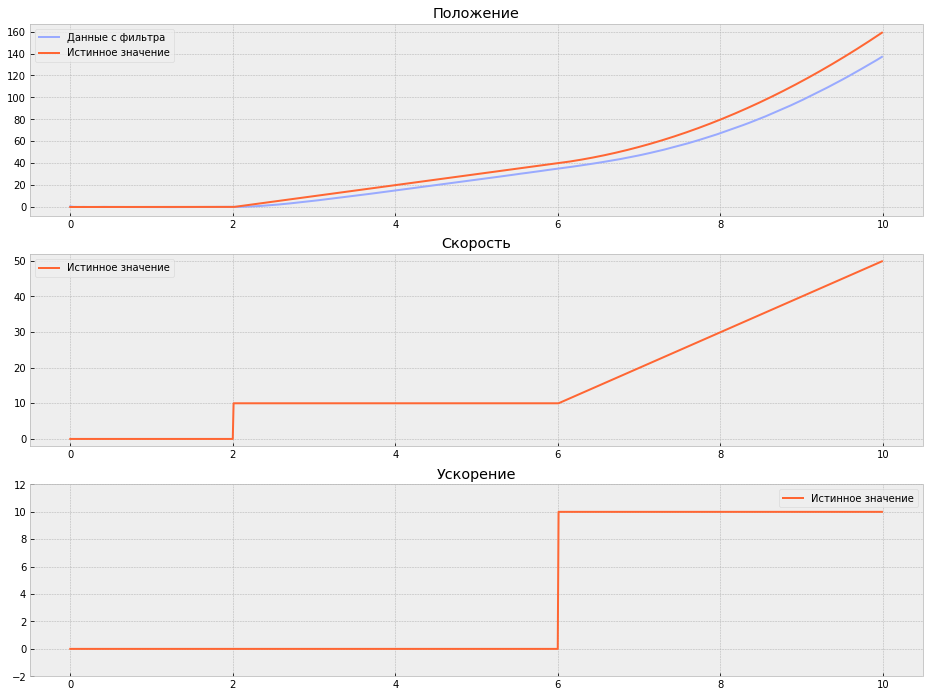

In [343]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, filter_state[:, 0], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, trajectory['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory['Скорость'].min() - 2, top=trajectory['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory.index, trajectory['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory['Ускорение'].min() - 2, top=trajectory['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()

#### Второй порядок производных

In [344]:
# создаем объект KalmanFilter
kf = kalman.KalmanFilter(
    dim_x=2,  # размер вектора состояния
    dim_z=1   # размер вектора измерений
)

# F - матрица процесса - размер dim_x на dim_x - 2x2
kf.F = np.array(
    [
        [1.0, dt],
        [0.0, 1.0],
    ]
)

# матрица наблюдения - dim_z на dim_x - 1x2
kf.H = np.array(
    [
        [1.0, 0.0]
    ]
)

# ковариационная матрица ошибки модели
kf.Q = np.array(
    [
        [dt ** 2, dt ], 
        [dt,      1.0]
    ]
) * process_noise

# ковариационная матрица ошибки измерения - 1x1
kf.R = np.array([[measurement_sigma * measurement_sigma]])

# начальное состояние
kf.x = np.array([0.0, 0.0])

# ковариационная матрица для начального состояния
s_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=0)
v_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=1)
kf.P = np.array(
    [
        [s_variance, 0.0,      ],
        [0.0,        v_variance]
    ]
)

filter_state = list()
state_covariance_history = list()

# обработка данных
for i, z in enumerate(trajectory['Показания_датчика'].values):
    z = [z]       # вектор измерений
    kf.predict()  # этап предсказания
    kf.update(z)  # этап коррекции
    
    filter_state.append(kf.x)
    state_covariance_history.append(kf.P)
    
filter_state = np.array(filter_state)
state_covariance_history = np.array(state_covariance_history)

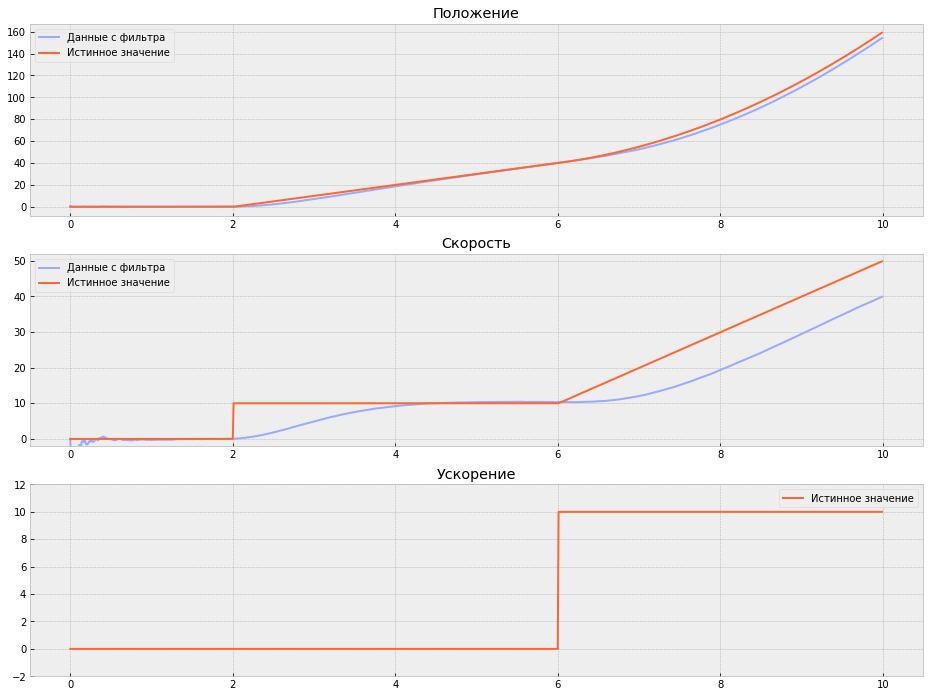

In [345]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, filter_state[:, 0], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, filter_state[:, 1], label='Данные с фильтра', color='#99AAFF')
    ax[1].plot(trajectory.index, trajectory['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory['Скорость'].min() - 2, top=trajectory['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory.index, trajectory['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory['Ускорение'].min() - 2, top=trajectory['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()

#### Третий порядок производных

In [346]:
# создаем объект KalmanFilter
kf = kalman.KalmanFilter(
    dim_x=3,  # размер вектора состояния
    dim_z=1   # размер вектора измерений
)

# F - матрица процесса - размер dim_x на dim_x - 3x3
kf.F = np.array(
    [
        [1.0, dt,  (dt**2)/2],
        [0.0, 1.0, dt],
        [0.0, 0.0, 1.0]
    ]
)

# матрица наблюдения - dim_z на dim_x - 1x3
kf.H = np.array(
    [
        [1.0, 0.0, 0.0]
    ]
)

# ковариационная матрица ошибки модели
kf.Q = common.Q_discrete_white_noise(dim=3, dt=dt, var=process_noise)

# ковариационная матрица ошибки измерения - 1x1
kf.R = np.array([[measurement_sigma * measurement_sigma]])

# начальное состояние
kf.x = np.array([0.0, 0.0, 0.0])

# ковариационная матрица для начального состояния
s_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=0)
v_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=1)
a_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=2)
kf.P = np.array(
    [
        [s_variance, 0.0,        0.0],
        [0.0,        v_variance, 0.0],
        [0.0,        0.0,        a_variance]
    ]
)

filter_state = list()
state_covariance_history = list()

# обработка данных
for i, z in enumerate(trajectory['Показания_датчика'].values):
    z = [z]       # вектор измерений
    kf.predict()  # этап предсказания
    kf.update(z)  # этап коррекции
    
    filter_state.append(kf.x)
    state_covariance_history.append(kf.P)
    
filter_state = np.array(filter_state)
state_covariance_history = np.array(state_covariance_history)

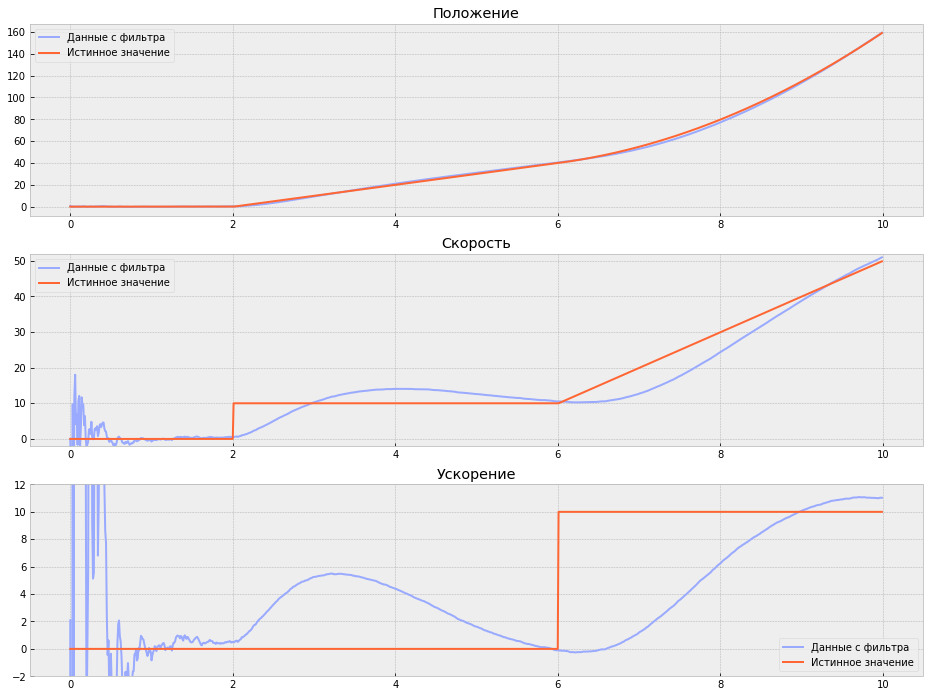

In [347]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, filter_state[:, 0], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, filter_state[:, 1], label='Данные с фильтра', color='#99AAFF')
    ax[1].plot(trajectory.index, trajectory['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory['Скорость'].min() - 2, top=trajectory['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory.index, filter_state[:, 2], label='Данные с фильтра', color='#99AAFF')
    ax[2].plot(trajectory.index, trajectory['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory['Ускорение'].min() - 2, top=trajectory['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()

# Нелинейные модели и фильтр Калмана

Выше мы рассматривали равноускоренной движение, которое неплохо аппроксимируется линейными моделями. В случаях, когда поведение объекта подчиняется нелинейному закону, линейные модели будут плохо его описывать.

Есть несколько модификаций фильтра Калмана, которые позволяют работать с нелинейными моделями.

Например:
- Extended Kalman Filter (EKF) - расширенный фильтр Калмана. Этот подход строит линейное приближение модели на каждом шаге. Для этого требуется рассчитать матрицу вторых частных производных функциии модели, что бывает весьма непросто. В некоторых случаях, аналитическое решение найти сложно или невозможно, и поэтому использую численные методы.

- Unscented Kalman Filter (UKF) - этот подход строит приближение распределения получающегося после нелинейного преобразования при помощи сигма точек. Преимуществом этого метода является то, что он не требует вычисления производных.

Рассмотрим UKF.

Основная магия этого алгоритма заключается в методе, который строит приближение распределения плотности вероятности случайной величины после прохождения через нелинейное преобразование. Этот метод достаточно точно строит приближение функции распределения случайной величины, но что более важно - он очень простой.

Для использования UKF не придется реализовывать какие-либо дополнительные вычисления, за исключением моделей системы. В общем виде, нелинейная модель не может быть представлена в виде матрицы, поэтому мы заменяем матрицы $ F $ и $ H $ на функции $ f(x) $ и $ h(x) $. Однако смысл этих моделей остается тем же.

Реализуем этот фильтр для линейной модели из прошлого примера.

In [352]:
# функция наблюдения - аналог матрицы наблюдения
# преобразует вектор состояния x в вектор измерений z
def measurement_function(x):
    return np.array([x[0]])


# функция процесса - аналог матрицы процесса
def state_transition_function(x, dt):
    new_state = np.zeros(3)
    new_state[0] = x[0] + dt * x[1] + ((dt ** 2) / 2) * x[2]
    new_state[1] = x[1] + dt * x[2]
    new_state[2] = x[2]
    
    return new_state


# для unscented kalman filter необходимо выбрать алгоритм выбора сигма-точек
points = kalman.JulierSigmaPoints(3, kappa=0)

# создаем объект UnscentedKalmanFilter
kf = kalman.UnscentedKalmanFilter(
    dim_x=3,
    dim_z=1,
    dt=dt,
    hx=measurement_function, 
    fx=state_transition_function,
    points=points
)

# ковариационная матрица ошибки модели
kf.Q = common.Q_discrete_white_noise(dim=3, dt=dt, var=process_noise)

# ковариационная матрица ошибки измерения - 1x1
kf.R = np.array([[measurement_sigma * measurement_sigma]])

# начальное состояние
kf.x = np.array([0.0, 0.0, 0.0])

# ковариационная матрица для начального состояния
s_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=0)
v_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=1)
a_variance = variance_calculation(data=trajectory['Показания_датчика'], dt=dt, derivative=2)
kf.P = np.array(
    [
        [s_variance, 0.0,        0.0],
        [0.0,        v_variance, 0.0],
        [0.0,        0.0,        a_variance]
    ]
)

filter_state = list()
state_covariance_history = list()

# обработка данных
for i, z in enumerate(trajectory['Показания_датчика'].values):
    z = [z]       # вектор измерений
    kf.predict()  # этап предсказания
    kf.update(z)  # этап коррекции
    
    filter_state.append(kf.x)
    state_covariance_history.append(kf.P)
    
filter_state = np.array(filter_state)
state_covariance_history = np.array(state_covariance_history)

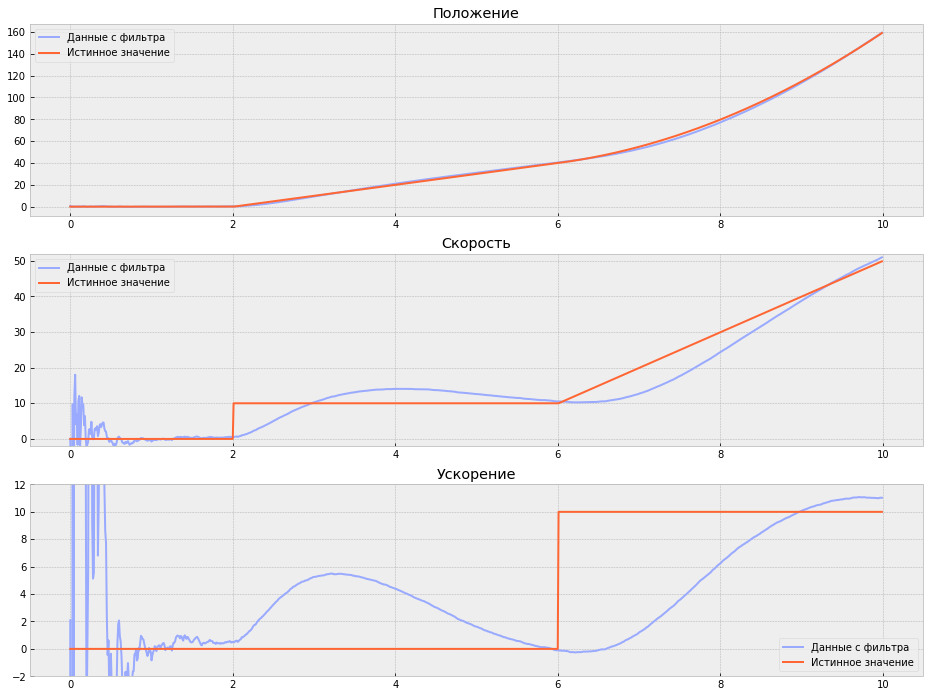

In [353]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory.index, filter_state[:, 0], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory.index, trajectory['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory.index, filter_state[:, 1], label='Данные с фильтра', color='#99AAFF')
    ax[1].plot(trajectory.index, trajectory['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory['Скорость'].min() - 2, top=trajectory['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory.index, filter_state[:, 2], label='Данные с фильтра', color='#99AAFF')
    ax[2].plot(trajectory.index, trajectory['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory['Ускорение'].min() - 2, top=trajectory['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()

Ожидаемый результат - график оценки положения практически не отличается от обычного фильтра Калмана.

В этом примере используется линейная модель, однако мы могли бы использовать нелинейные функции, например sin или cos.

Данный метод требует оценки / подбора функциии изменения состояния. Например, в данном случае использовалась функция равноускоренного движения. Но могла быть какая-либо другая функция.

# Попытка использовать блочную матрицу для предсказания сразу нескольких метрик

## Генерируем данные

Метрика 1

In [19]:
dt_1 = 0.01                # шаг времени
measurement_sigma_1 = 0.5  # среднеквадратичное отклонение ошибки датчика
process_noise_1 = 1e-4     # погрешность модели

# начальное состояние [положение, скорость, ускорение]
trajectory_1 = simulate_sensor(
    sample_size=1000, 
    noise_sigma=measurement_sigma_1, 
    dt=dt_1, 
    initial_state=np.array([0, 1, 0])
)

display(trajectory_1.head())
print(trajectory_1.shape)

,Положение,Скорость,Ускорение,Показания_датчика
0.00,0.00,1.0,0.0,-0.020648
0.01,0.01,1.0,0.0,0.498871
0.02,0.02,1.0,0.0,-0.552852
0.03,0.03,1.0,0.0,0.473618
0.04,0.04,1.0,0.0,0.808520


(1000, 4)


Метрика 2

In [20]:
dt_2 = 0.01                # шаг времени
measurement_sigma_2 = 0.5  # среднеквадратичное отклонение ошибки датчика
process_noise_2 = 1e-4     # погрешность модели

# начальное состояние [положение, скорость, ускорение]
trajectory_2 = simulate_sensor(
    sample_size=1000,
    noise_sigma=measurement_sigma_2,
    dt=dt_2,
    initial_state=np.array([0, 0, 0]),
    change_points=(0.2, 0.6),
    change_values=(10, 10)
)

display(trajectory_2.head())
print(trajectory_2.shape)

,Положение,Скорость,Ускорение,Показания_датчика
0.00,0.0,0.0,0.0,-0.397895
0.01,0.0,0.0,0.0,0.133623
0.02,0.0,0.0,0.0,0.414475
0.03,0.0,0.0,0.0,0.571047
0.04,0.0,0.0,0.0,0.359695


(1000, 4)


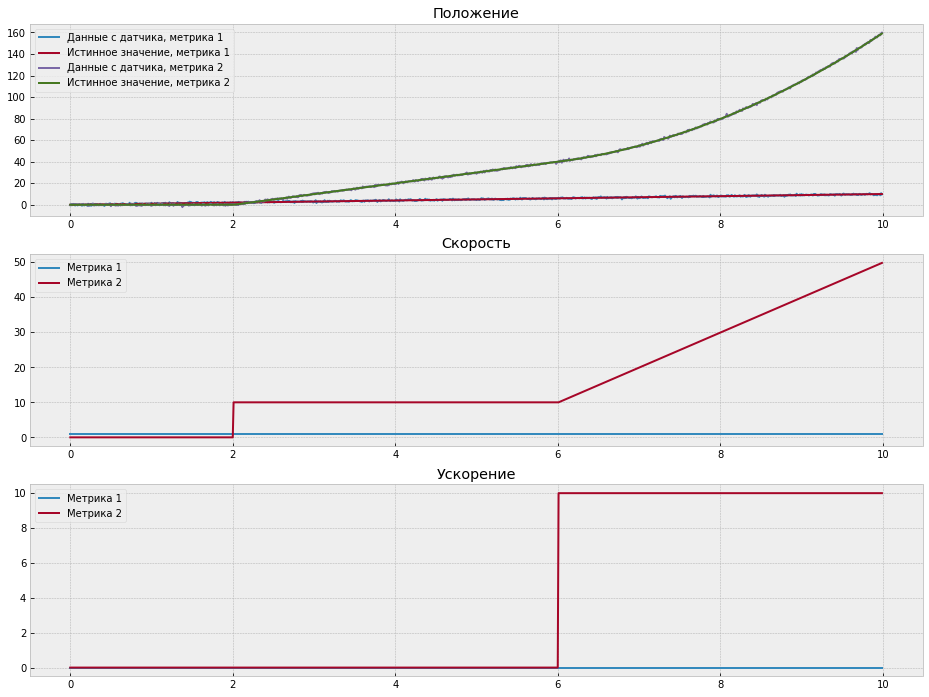

In [21]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(
        trajectory_1.index, trajectory_1['Показания_датчика'], label='Данные с датчика, метрика 1')
    ax[0].plot(
        trajectory_1.index, trajectory_1['Положение'], label="Истинное значение, метрика 1")
    ax[0].plot(
        trajectory_2.index, trajectory_2['Показания_датчика'], label='Данные с датчика, метрика 2')
    ax[0].plot(
        trajectory_2.index, trajectory_2['Положение'], label="Истинное значение, метрика 2")
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory_1.index, trajectory_1['Скорость'], label="Метрика 1")
    ax[1].plot(trajectory_2.index, trajectory_2['Скорость'], label="Метрика 2")
    ax[1].set_title('Скорость')
    ax[1].legend()
    
    ax[2].plot(trajectory_1.index, trajectory_1['Ускорение'], label="Метрика 1")
    ax[2].plot(trajectory_2.index, trajectory_2['Ускорение'], label="Метрика 2")
    ax[2].set_title('Ускорение')
    ax[2].legend()
    fig.show()

## Применяем фильтр Калмана

In [73]:
# создаем объект KalmanFilter
kf = kalman.KalmanFilter(
    dim_x=6,  # размер вектора состояния, 6 - т.к. по три значения на две метрики (положение, скорость, ускорение)
    dim_z=2   # размер вектора измерений (т.к. две метрики), 
)

# F - матрица процесса - размер dim_x на dim_x - 6x6
# блочная матрица - по диагонали модели для каждой из метрик. Остальные - 0
# модель для метрики 1
F_1 = np.array(
    [
        [1.0,   dt_1,  (dt_1**2)/2],
        [0.0,   1.0,   dt_1,      ],
        [0.0,   0.0,   1.0,       ]
    ]
)

# модель для метрики 2
F_2 = np.array(
    [
        [1.0,   dt_2,  (dt_2**2)/2],
        [0.0,   1.0,   dt_2,      ],
        [0.0,   0.0,   1.0,       ]
    ]
)

# формируем болчную диагональную матрицу
kf.F = scipy.linalg.block_diag(F_1, F_2)

# матрица наблюдения - dim_z на dim_x - 2x6
# также является блочной диагональной (блок - [1.0, 0.0, 0.0])
# матрица наблюдения для метрики 1
H_1 = np.array(
    [
        [1.0, 0.0, 0.0]
    ]
)

# матрица наблюдения для метрики 2
H_2 = np.array(
    [
        [1.0, 0.0, 0.0]
    ]
)

kf.H = scipy.linalg.block_diag(H_1, H_2)

# ковариационная матрица ошибки модели
# размер dim_x на dim_x - 6x6
# также является блочной диагональной матрицей
Q_1 = common.Q_discrete_white_noise(dim=3, dt=dt_1, var=process_noise_1)  # для метрики 1
Q_2 = common.Q_discrete_white_noise(dim=3, dt=dt_2, var=process_noise_2)  # для метрики 2
kf.Q = scipy.linalg.block_diag(Q_1, Q_2)

# ковариационная матрица ошибки измерения - 1x1
R_1 = np.array([[measurement_sigma_1 * measurement_sigma_1]])
R_2 = np.array([[measurement_sigma_2 * measurement_sigma_2]])
kf.R = scipy.linalg.block_diag(R_1, R_2)

# начальное состояние
# начальное состояние метрики 1
x_1 = np.array([0.0, 0.0, 0.0])

# начальное состояние метрики 
x_2 = np.array([0.0, 0.0, 0.0])
kf.x = np.concatenate([x_1, x_2])

# ковариационная матрица для начального состояния
# для метрики 1
s_variance_1 = variance_calculation(data=trajectory_1['Показания_датчика'], dt=dt_1, derivative=0)
v_variance_1 = variance_calculation(data=trajectory_1['Показания_датчика'], dt=dt_1, derivative=1)
a_variance_1 = variance_calculation(data=trajectory_1['Показания_датчика'], dt=dt_1, derivative=2)

P_1 = np.array(
    [
        [s_variance_1, 0.0,          0.0],
        [0.0,          v_variance_1, 0.0],
        [0.0,          0.0,          a_variance_1]
    ]
)

# для метрики 2
s_variance_2 = variance_calculation(data=trajectory_2['Показания_датчика'], dt=dt_2, derivative=0)
v_variance_2 = variance_calculation(data=trajectory_2['Показания_датчика'], dt=dt_2, derivative=1)
a_variance_2 = variance_calculation(data=trajectory_2['Показания_датчика'], dt=dt_2, derivative=2)

P_2 = np.array(
    [
        [s_variance_2, 0.0,          0.0],
        [0.0,          v_variance_2, 0.0],
        [0.0,          0.0,          a_variance_2]
    ]
)

kf.P = scipy.linalg.block_diag(P_1, P_2)

filter_state = list()
state_covariance_history = list()

# обработка данных
for i, (z_1, z_2) in enumerate(
    zip(trajectory_1['Показания_датчика'].values, trajectory_2['Показания_датчика'].values)):
    z = [z_1, z_2]       # вектор измерений
    kf.predict()         # этап предсказания
    kf.update(z)         # этап коррекции
    
    filter_state.append(kf.x)
    state_covariance_history.append(kf.P)
    
filter_state = np.array(filter_state)
state_covariance_history = np.array(state_covariance_history)

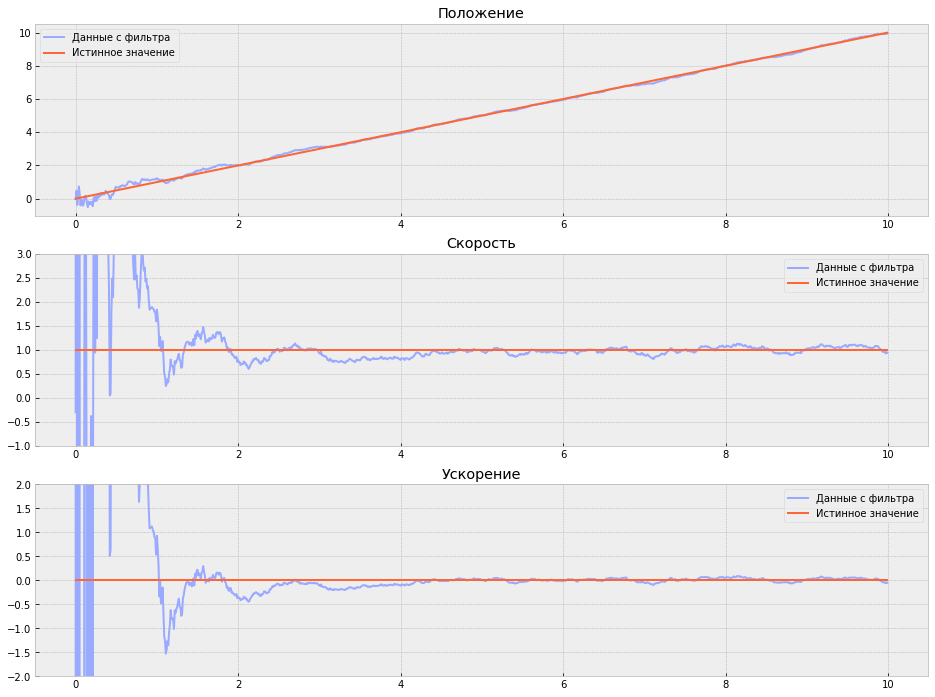

In [80]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory_1.index, filter_state[:, 0], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory_1.index, trajectory_1['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory_1.index, filter_state[:, 1], label='Данные с фильтра', color='#99AAFF')
    ax[1].plot(trajectory_1.index, trajectory_1['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory_1['Скорость'].min() - 2, top=trajectory_1['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory_1.index, filter_state[:, 2], label='Данные с фильтра', color='#99AAFF')
    ax[2].plot(trajectory_1.index, trajectory_1['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory_1['Ускорение'].min() - 2, top=trajectory_1['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()

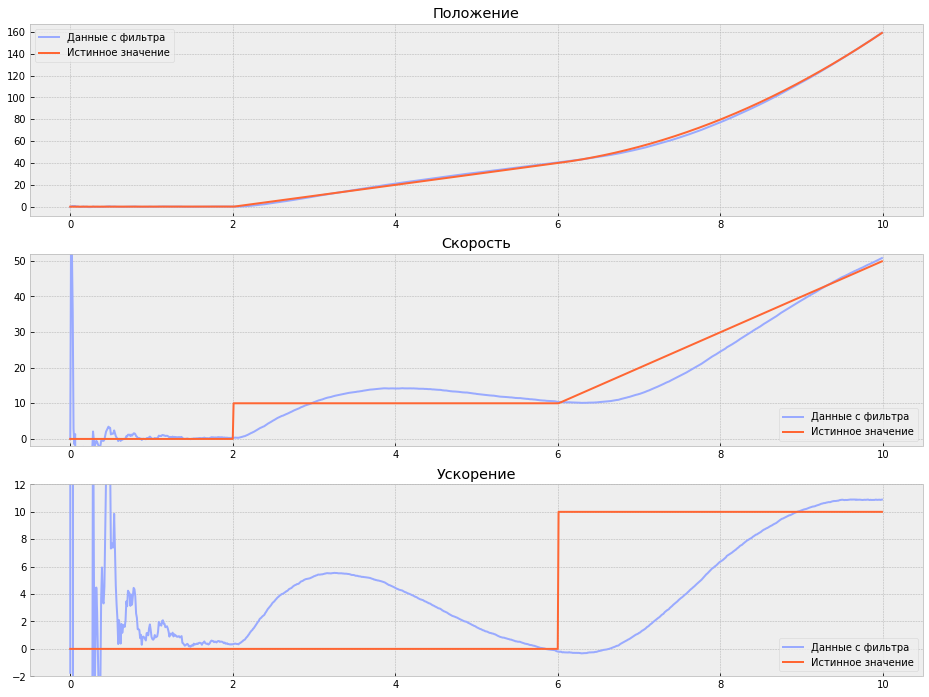

In [82]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].plot(trajectory_2.index, filter_state[:, 3], label='Данные с фильтра', color='#99AAFF')
    ax[0].plot(trajectory_2.index, trajectory_2['Положение'], label="Истинное значение", color='#FF6633')
    ax[0].set_title('Положение')
    ax[0].legend()
    
    ax[1].plot(trajectory_2.index, filter_state[:, 4], label='Данные с фильтра', color='#99AAFF')
    ax[1].plot(trajectory_2.index, trajectory_2['Скорость'], label='Истинное значение', color='#FF6633')
    ax[1].set_title('Скорость')
    ax[1].set_ylim(bottom=trajectory_2['Скорость'].min() - 2, top=trajectory_2['Скорость'].max() + 2)
    ax[1].legend()
    
    ax[2].plot(trajectory_2.index, filter_state[:, 5], label='Данные с фильтра', color='#99AAFF')
    ax[2].plot(trajectory_2.index, trajectory_2['Ускорение'], label='Истинное значение', color='#FF6633')
    ax[2].set_title('Ускорение')
    ax[2].set_ylim(bottom=trajectory_2['Ускорение'].min() - 2, top=trajectory_2['Ускорение'].max() + 2)
    ax[2].legend()
    fig.show()